In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
import tensorflow as tf

import pickle

In [2]:
# config gpu
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load the training dataset

In [2]:
train_df = pd.read_csv("../data/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
print(f"size of training dataset: {train_df.size}\n")
print(f"Shape of training dataset: {train_df.shape}\n")
train_df.sample(10)

size of training dataset: 21552175

Shape of training dataset: (27455, 785)



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15529,10,113,114,116,120,129,139,145,149,151,153,158,162,165,168,170,173,176,178,179,179,180,181,181,182,181,180,181,181,113,115,117,121,131,140,146,151,152,155,160,...,200,162,140,131,111,158,230,220,221,222,222,222,118,118,128,143,156,167,174,175,180,189,191,209,230,220,192,209,196,160,146,133,110,182,230,220,221,222,222,222
20742,16,163,168,174,179,183,186,189,192,194,198,200,203,206,208,206,204,200,202,209,214,212,210,212,213,214,213,213,215,165,171,176,181,185,188,191,194,197,199,202,...,125,133,120,109,79,69,86,75,77,87,104,77,192,200,205,210,214,217,222,223,224,212,204,182,153,157,147,127,115,111,111,104,74,75,95,99,80,76,80,72
15194,16,123,74,122,136,89,36,68,92,93,96,98,100,103,107,112,115,121,127,133,139,142,143,145,147,151,153,155,158,117,77,128,137,80,37,75,92,92,96,99,...,160,150,148,146,125,126,112,109,111,115,118,118,175,125,33,62,101,97,96,97,99,92,123,228,203,168,167,160,151,153,141,143,122,123,109,108,113,114,118,113
14979,24,160,164,165,166,167,168,169,171,171,171,171,171,170,171,171,170,169,169,169,169,166,164,163,161,161,161,158,155,163,164,167,168,170,170,171,173,174,174,173,...,3,4,1,168,224,215,217,218,212,168,80,66,205,208,212,212,109,93,82,63,51,41,30,21,10,5,1,0,0,0,56,226,217,221,208,152,106,69,59,53
27363,7,170,173,175,177,179,181,184,185,185,186,188,190,192,192,193,195,196,196,197,198,199,200,199,200,200,200,200,200,172,173,175,178,180,182,183,185,186,187,189,...,199,200,201,202,202,202,203,203,205,204,204,205,172,175,178,179,181,183,186,187,189,190,191,193,195,195,196,199,199,200,201,202,202,202,203,202,205,203,208,234
680,20,85,48,95,100,108,116,128,141,150,158,164,167,170,173,176,179,183,184,185,187,190,192,192,193,193,194,195,196,72,53,98,102,110,117,130,143,151,160,164,...,146,120,90,161,229,221,225,227,229,228,229,229,101,106,112,118,133,146,156,167,176,178,210,227,200,189,175,155,140,119,91,153,227,219,223,224,226,226,226,228
26708,23,169,172,176,179,180,181,183,182,183,183,182,182,179,181,183,178,176,176,176,175,173,172,171,170,116,144,173,197,173,178,182,184,186,187,188,187,187,186,184,...,48,47,44,37,25,31,36,37,30,20,29,30,126,96,90,212,198,175,155,150,131,107,98,84,83,23,7,34,48,46,45,39,30,23,30,32,34,22,22,29
25307,10,201,204,208,210,212,213,214,217,217,218,217,218,219,219,219,219,219,220,219,219,220,219,218,217,216,214,212,211,205,208,211,215,218,218,219,221,220,221,221,...,211,151,122,142,151,148,150,149,150,139,169,199,131,131,133,136,133,132,132,135,138,131,238,255,237,248,219,218,217,154,120,137,144,140,143,141,150,223,255,255
4231,19,197,198,199,199,199,199,200,200,200,200,199,198,197,197,196,196,196,195,193,192,192,173,141,191,161,124,94,154,198,199,199,200,200,200,200,201,200,200,198,...,156,169,173,144,131,158,170,183,194,201,186,181,196,205,184,164,144,123,105,97,88,140,213,214,228,218,139,105,137,162,175,161,127,150,170,176,186,199,190,174
10964,23,201,201,204,204,204,204,204,205,204,203,203,204,203,202,203,203,198,199,198,197,197,196,196,195,192,192,192,191,202,204,206,206,206,206,206,205,206,207,205,...,112,86,143,237,229,229,228,227,226,224,223,221,235,237,238,238,238,216,251,252,238,208,176,142,116,106,99,95,97,147,234,229,230,230,228,228,225,222,222,221


## Exploration on dataset

In [3]:
print("info about dataset\n")
print(train_df.info())

print("\nTotal number of columns with null value\n")
print(train_df.isna().sum())

info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None

Total number of columns with null value

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [4]:
print("\nDescibe the dataset")
print(train_df.describe())


Descibe the dataset
              label        pixel1  ...      pixel783      pixel784
count  27455.000000  27455.000000  ...  27455.000000  27455.000000
mean      12.318813    145.419377  ...    161.137898    159.824731
std        7.287552     41.358555  ...     63.610415     64.396846
min        0.000000      0.000000  ...      0.000000      0.000000
25%        6.000000    121.000000  ...    128.000000    125.500000
50%       13.000000    150.000000  ...    182.000000    182.000000
75%       19.000000    174.000000  ...    204.000000    204.000000
max       24.000000    255.000000  ...    255.000000    255.000000

[8 rows x 785 columns]


total number for 0: 1126
total number for 1: 1010
total number for 2: 1144
total number for 3: 1196
total number for 4: 957
total number for 5: 1204
total number for 6: 1090
total number for 7: 1013
total number for 8: 1162
total number for 10: 1114
total number for 11: 1241
total number for 12: 1055
total number for 13: 1151
total number for 14: 1196
total number for 15: 1088
total number for 16: 1279
total number for 17: 1294
total number for 18: 1199
total number for 19: 1186
total number for 20: 1161
total number for 21: 1082
total number for 22: 1225
total number for 23: 1164
total number for 24: 1118


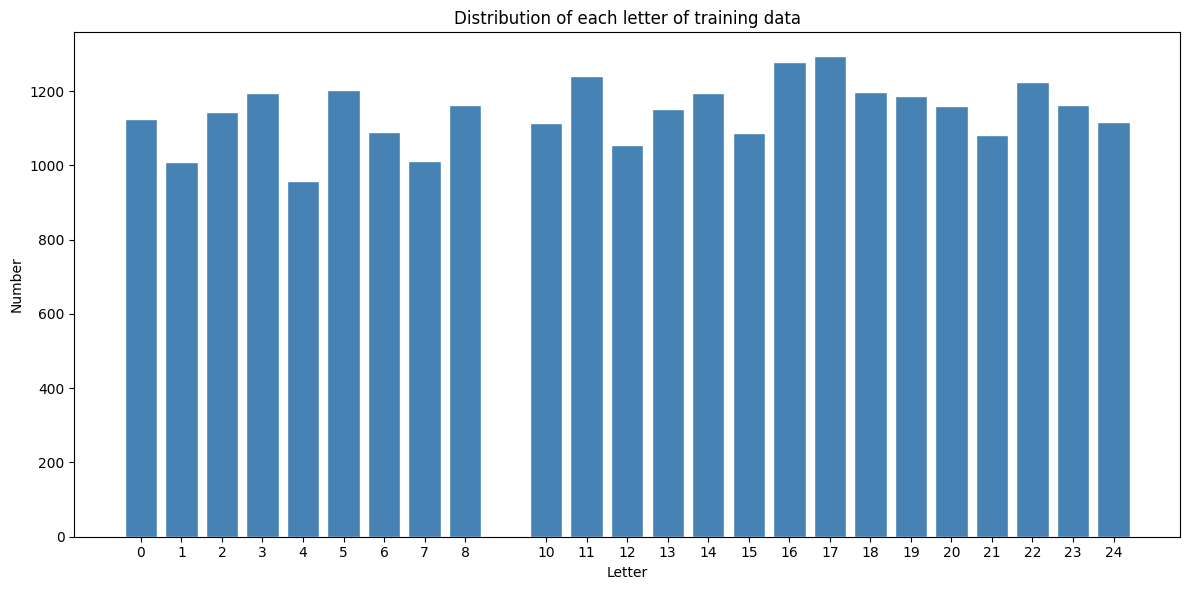

In [5]:
for label in sorted(train_df["label"].unique()):
    count = (train_df["label"] == label).sum()
    print(f"total number for {label}: {count}")

label_counts = train_df["label"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values, color="steelblue", edgecolor="white")
plt.xlabel("Letter")
plt.ylabel("Number")
plt.title("Distribution of each letter of training data")
plt.xticks(label_counts.index)
plt.tight_layout()
plt.show()

## Split data into features (X) and labels (y)

In [6]:
np.random.seed(42)
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

print(f"Training samples: {X_train.shape[0]}, Features: {X_train.shape[1]}, Classes: {len(np.unique(y_train))}")

Training samples: 27455, Features: 784, Classes: 24


# Normalize training feature Columns

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# parameters for RandomForestClassifier

In [ ]:
rrf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

## Train the baseline model (Random Forest)

In [ ]:
model = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rrf_params,
    n_iter=50,
    cv=5,
    verbose=True,
)
model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [20, 30, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.

## Load the test dataset

In [15]:
test_df = pd.read_csv("../data/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
test_df.shape, test_df.size

((7172, 785), 5630020)

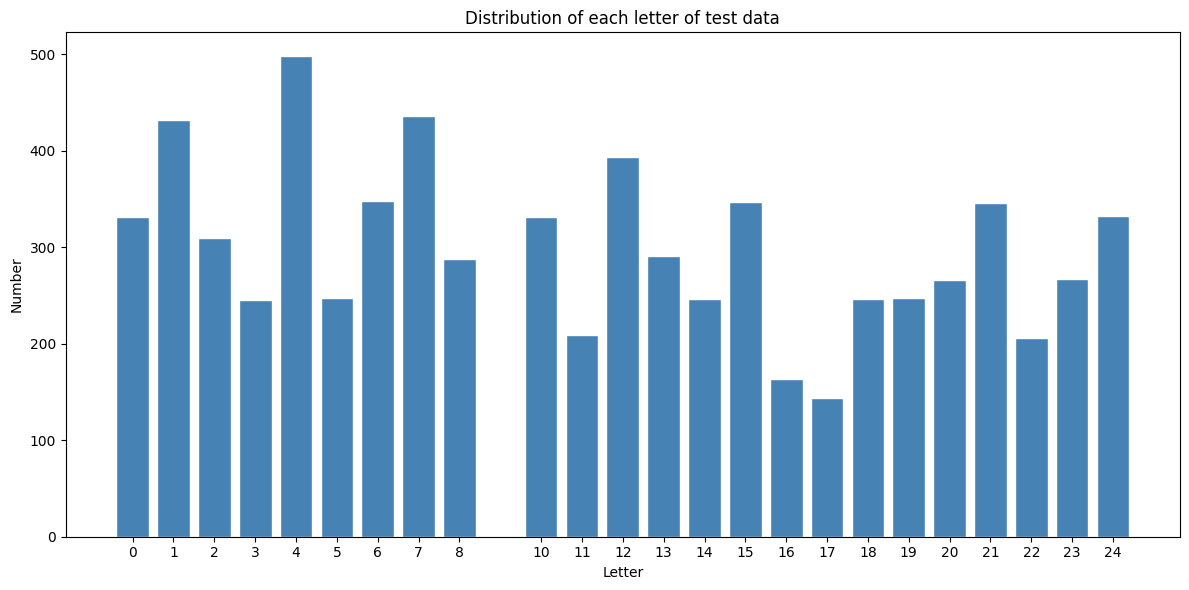

In [16]:
test_label_counts = test_df["label"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(test_label_counts.index, test_label_counts.values, color="steelblue", edgecolor="white")
plt.xlabel("Letter")
plt.ylabel("Number")
plt.title("Distribution of each letter of test data")
plt.xticks(test_label_counts.index)
plt.tight_layout()
plt.show()

## split the testing dataset into feature and labels

In [17]:
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# Nomalize testin feature columns

In [18]:
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
model.score(X_test_scaled, y_test)

0.8223647518126046

## Prediction

In [25]:
y_pred = model.predict(X_test_scaled)
y_pred

array([ 6,  5, 10, ...,  2,  4,  2], shape=(7172,))

In [26]:
np.array(y_test)

array([ 6,  5, 10, ...,  2,  4,  2], shape=(7172,))

## Evaluate different metrices

In [27]:
print(f"Accuracy:  {model.score(X_test, y_test):.4f}")
print(f"F1 (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")

/Users/sumanyadav/Desktop/ULM/Spring2026/AI/CSCI4083-MidCourseProject/.venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy:  0.0346
F1 (macro): 0.8061
Precision (macro): 0.8148
Recall (macro): 0.8138


## Confusion metrix

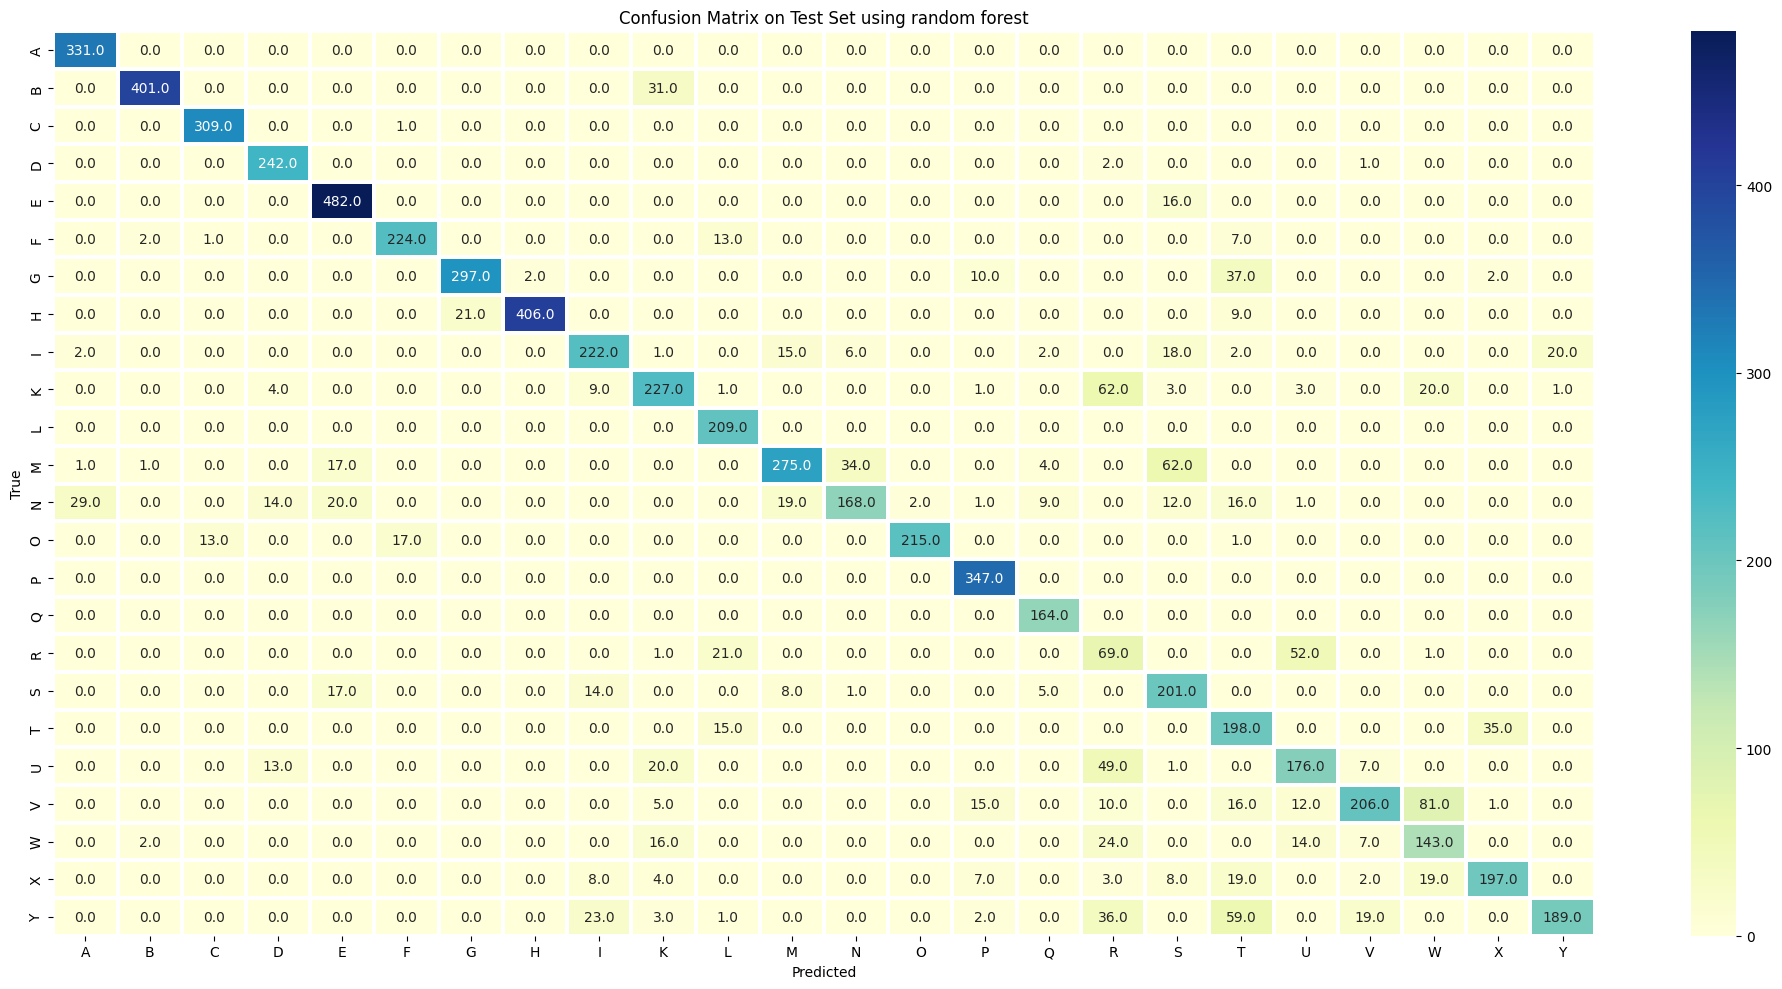

In [28]:
conff_matrix = confusion_matrix(y_test, y_pred)
class_labels = list("ABCDEFGHI") + list("KLMNOPQRSTUVWXY")  # dataset is missing J, and Z
plt.figure(figsize=(20, 10))
sns.heatmap(conff_matrix, annot=True, linewidths=1.5, fmt=".1f", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Test Set using random forest")
plt.tight_layout()
plt.show()

In [29]:
MODEL_PATH = "baseline_model.pkl"
with open(MODEL_PATH, "wb") as f:
        pickle.dump(model, f)
print(f"Model is saved as {MODEL_PATH}")

Model is saved as baseline_model.pkl
